# Case Study 1 : Collecting Data from Twitter

Due Date: September 21, **BEFORE the beginning of class at 6:00pm**

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team
* Yan Wu
* Shiyang Xia
* Yuhao Zheng
* Zijun Xu
* Han Bao

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

**You may need to install uuid.**

Input command: `pip install uuid` , or visit [uuid 1.30](https://pypi.python.org/pypi/uuid/) for more information.

In [1]:
import twitter
#---------------------------------------------
# Define a Function to Login Twitter API

def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    CONSUMER_KEY = 'THNn3A8S9iEVVoxwujipnwvnt'
    CONSUMER_SECRET = 'cyBdLmR8GpychGE69Co1x1Uw1sgsrs00Yyeye8YipuUBtw4Fsq'
    OAUTH_TOKEN = '1625211115-DgaXEatHXAUOrzKwlPXiwgOFDKA28JoA3xDcx4T'
    OAUTH_TOKEN_SECRET = '5FL2PVPnIz6fRVuQpQdENsGiMusFgQqqMB3XcvOvDv7uN'
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import os
from uuid import uuid4
import json

# Define a function to save data in a file
def save_to_file(file_name, data):
    with open(file_name, mode='w') as f:
        f.write(json.dumps(data, indent=2))


# Define a function to save at most max_num of tweets in some topic to a file
def save_topic_to_file(topic, max_num, directory):
    if not os.path.exists('./' + directory):
        os.makedirs('./' + directory)
    count = 1
    while True:
        twitter_stream = twitter.TwitterStream(auth=oauth_login().auth)
        filtered_stream = twitter_stream.statuses.filter(track=topic, language='en')
        while True:
            data = []
            for tweet in filtered_stream:
                if max_num <= 0 < len(data):
                    save_to_file(directory + '/' + str(uuid4()) + '.json', data)
                    return
                data.append(tweet)
                max_num -= 1
                # Save every 50 tweets to a new file
                if len(data) == 50:
                    save_to_file(directory + '/' + str(uuid4()) + '.json', data)
                    break
            print('Gathered ' + str(count * 50) + ' tweets')
            count += 1


save_topic_to_file(topic='trump', max_num=100, directory='p1-data')

Gathered 50 tweets
Gathered 100 tweets


### Report some statistics about the tweets you collected 

* The topic of interest: < INSERT YOUR TOPIC HERE>


* The total number of tweets collected:  < INSERT THE NUMBER HERE>

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

**You may need to install prettytable and wordcloud.**

* Input command: `pip install prettytable` , or visit [PrettyTable 0.7.2](https://pypi.python.org/pypi/PrettyTable) for more information.
* Input command: `pip install wordcloud` , or visit [wordcloud 1.3.1](https://pypi.python.org/pypi/wordcloud) for more information.

+------+-------------+-------+
| Rank |     Word    | Times |
+------+-------------+-------+
|  1   |    trump    |  132  |
|  2   |    white    |   26  |
|  3   |   calling   |   20  |
|  4   | supremacist |   19  |
|  5   |  president  |   18  |
|  6   |    obama    |   17  |
|  7   |    donald   |   15  |
|  8   |    racist   |   12  |
|  9   |    people   |   12  |
|  10  |     i'm     |   12  |
|  11  |     get     |   12  |
|  12  |   trump's   |   11  |
|  13  |    don't    |   10  |
|  14  |    attack   |   9   |
|  15  |     deal    |   9   |
|  16  |    london   |   9   |
|  17  |     like    |   8   |
|  18  |     call    |   8   |
|  19  |     says    |   8   |
|  20  |    would    |   7   |
|  21  |     bed     |   7   |
|  22  |     lies    |   7   |
|  23  |  apologize  |   7   |
|  24  |   american  |   7   |
|  25  |   election  |   7   |
|  26  |    anyone   |   7   |
|  27  |    woman    |   7   |
|  28  |     it's    |   7   |
|  29  |    loser    |   7   |
|  30  |

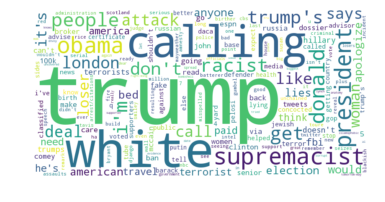

In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json
import operator
import os

import matplotlib.pyplot as plt
from prettytable import PrettyTable
from wordcloud import WordCloud, STOPWORDS

from lib.word_utils import word_filter


def load_json(path):
    whole_data = []
    path = './' + path
    for filename in os.listdir(path):
        with open(path + '/' + filename, mode='r') as f:
            whole_data += json.load(f)
    return whole_data


# Define a function to get top words
def get_top_words(path, max_num):
    # A list of all the tweets collected.
    whole_data = load_json(path)
    # A list of words which appear in the tweets
    word_list = []
    for data in whole_data:
        if 'text' not in data:
            continue
        word_list += data['text'].split()
    # A dictionary of words frequency, key is word, value is frequency
    frequency_dict = {}
    for word in word_list:
        word = word_filter(word)
        if len(word) > 0:
            frequency_dict[word] = frequency_dict.get(word, 0) + 1
    # A list of tuples (word, frequency), sorted by the frequency
    sorted_list = reversed(sorted(frequency_dict.items(), key=operator.itemgetter(1)))
    # Print top table
    count = 0
    table = PrettyTable(['Rank', 'Word', 'Times'])
    for item in sorted_list:
        table.add_row([str(count + 1), item[0], item[1]])
        count = count + 1
        if count == max_num:
            break
    print(table)
    # Generate word map
    wordcloud = WordCloud(background_color="white", stopwords=STOPWORDS, width=800, height=400)
    wordcloud.generate_from_frequencies(frequencies=frequency_dict)
    wordcloud.to_file(path + '.png')
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


get_top_words(path='p1-data', max_num=30)

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [23]:
import json
import operator
import os


def load_json(path):
    whole_data = []
    path = './' + path
    for filename in os.listdir(path):
        with open(path + '/' + filename, mode='r') as f:
            whole_data += json.load(f)
    return whole_data


# Define a function to get top retweets
def get_top_retweets(path, max_num):
    # A list of all the tweets collected.
    whole_data = load_json(path)
    # id_text_dict is a dictionary to store twitter ID and twitter text
    id_text_dict = {}
    # frequency_dict is a dictionary to store twitter ID and frequency
    frequency_dict = {}
    for twitter in whole_data:
        if 'retweeted_status' not in twitter:
            continue
        retweet_dict = twitter['retweeted_status']
        id_text_dict[retweet_dict['id']] = retweet_dict['text']
        frequency_dict[retweet_dict['id']] = frequency_dict.get(retweet_dict['id'], 0) + 1
    # A list of tuples (word, frequency), sorted by the frequency
    sorted_list = reversed(sorted(frequency_dict.items(), key=operator.itemgetter(1)))
    # Print top retweets
    count = 0
    for item in sorted_list:
        print('Top ' + str(count + 1) + '\t' + str(item[1]) + ' times')
        print(id_text_dict[item[0]])
        print('\nLink to this tweet: https://twitter.com/i/web/status/' + str(item[0]))
        print('-'.rjust(100, '-'))
        count += 1
        if count == max_num:
            break


get_top_retweets(path='p1-data', max_num=10)


Top 1	2 times
Senior advisor to the President says people shouldn't expect her to advise the President. https://t.co/0irT8eGZCv

Link to this tweet: https://twitter.com/i/web/status/908334558520672257
----------------------------------------------------------------------------------------------------
Top 2	1 times
Some people are more upset over Trump's tweet than the actual London attack.

Same thing. Every time.

Give it a fucking rest for 5 minutes…

Link to this tweet: https://twitter.com/i/web/status/908672777573498880
----------------------------------------------------------------------------------------------------
Top 3	1 times
Trump promises to veto single payer health care, should it get to his desk. No surprise. His rich friends wouldn't like that at all.

Link to this tweet: https://twitter.com/i/web/status/908419666699280384
----------------------------------------------------------------------------------------------------
Top 4	1 times
@dbongino @DarLovesAmerica It's be

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [25]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import json
import operator
import os
from prettytable import PrettyTable


def load_json(path):
    whole_data = []
    path = './' + path
    for filename in os.listdir(path):
        with open(path + '/' + filename, mode='r') as f:
            whole_data += json.load(f)
    return whole_data


def get_top_tags(path, max_num):
    # A list of all the tweets collected.
    whole_data = load_json(path)
    # A dictionary of tag frequency, key is tag, value is frequency
    frequency_dict = {}
    for twitter in whole_data:
        if 'entities' not in twitter or 'hashtags' not in twitter['entities']:
            continue
        tags = twitter['entities']['hashtags']
        if len(tags) == 0:
            continue
        for tag in tags:
            frequency_dict[tag['text']] = frequency_dict.get(tag['text'], 0) + 1
    # A list of tuples (word, frequency), sorted by the frequency
    sorted_list = reversed(sorted(frequency_dict.items(), key=operator.itemgetter(1)))
    # Print top tags
    count = 0
    table = PrettyTable(['Rank', 'Hashtag', 'Times'])
    for item in sorted_list:
        table.add_row([str(count + 1), item[0], item[1]])
        count = count + 1
        if count == max_num:
            break
    print('Top 10 Hashtags:')
    print(table)


def get_top_mentions(path, max_num):
    # A list of all the tweets collected.
    whole_data = load_json(path)
    # A dictionary of tag frequency, key is tag, value is frequency
    frequency_dict = {}
    id_name_dict = {}
    for twitter in whole_data:
        if 'entities' not in twitter or 'user_mentions' not in twitter['entities']:
            continue
        mentions = twitter['entities']['user_mentions']
        if len(mentions) == 0:
            continue
        for mention in mentions:
            frequency_dict[mention['id']] = frequency_dict.get(mention['id'], 0) + 1
            id_name_dict[mention['id']] = mention['screen_name']
    # A list of tuples (word, frequency), sorted by the frequency
    sorted_list = reversed(sorted(frequency_dict.items(), key=operator.itemgetter(1)))
    # Print top tags
    count = 0
    table = PrettyTable(['Rank', 'ID', 'Screen-name', 'Times'])
    for item in sorted_list:
        table.add_row([str(count + 1), item[0], id_name_dict[item[0]], item[1]])
        count = count + 1
        if count == max_num:
            break
    print('Top 10 Mentions:')
    print(table)


get_top_tags(path='p1-data', max_num=10)
get_top_mentions(path='p1-data', max_num=10)

Top 10 Hashtags:
+------+---------------------+-------+
| Rank |       Hashtag       | Times |
+------+---------------------+-------+
|  1   | NaziBucketChallenge |   3   |
|  2   |        Trump        |   2   |
|  3   |      Republican     |   1   |
|  4   |   VotingRightsAct   |   1   |
|  5   |     ImpeachTrump    |   1   |
|  6   |    TheResistance    |   1   |
|  7   |    artusalawfirm    |   1   |
|  8   |    thetrumpreport   |   1   |
|  9   |   LetLoveTrumpAll   |   1   |
|  10  |    TrumpTerrorism   |   1   |
+------+---------------------+-------+
Top 10 Mentions:
+------+--------------------+-----------------+-------+
| Rank |         ID         |   Screen-name   | Times |
+------+--------------------+-----------------+-------+
|  1   |      25073877      | realDonaldTrump |   2   |
|  2   |     130496027      |     jonfavs     |   2   |
|  3   | 822215679726100480 |      POTUS      |   2   |
|  4   |     2262269870     |  ThMadScientist |   1   |
|  5   |     2233154425     

* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [26]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import twitter
from prettytable import PrettyTable


def oauth_login():
    CONSUMER_KEY = 'THNn3A8S9iEVVoxwujipnwvnt'
    CONSUMER_SECRET = 'cyBdLmR8GpychGE69Co1x1Uw1sgsrs00Yyeye8YipuUBtw4Fsq'
    OAUTH_TOKEN = '1625211115-DgaXEatHXAUOrzKwlPXiwgOFDKA28JoA3xDcx4T'
    OAUTH_TOKEN_SECRET = '5FL2PVPnIz6fRVuQpQdENsGiMusFgQqqMB3XcvOvDv7uN'
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api


twitter_api = oauth_login()
friends = twitter_api.friends.ids(screen_name='LucaMWayne')
friend_list = []
for id in friends['ids']:
    friend_list.append((id, twitter_api.users.lookup(user_id=id)[0]['screen_name']))
count = 0
friend_table = PrettyTable(['id', 'screen_name'])
for row in friend_list:
    friend_table.add_row(row)
    count += 1
    if count == 20:
        break
print('20 of Friends ')
print(friend_table)

followers = twitter_api.followers.ids(screen_name='LucaMWayne')
follower_list = []
for id in followers['ids']:
    follower_list.append((id, twitter_api.users.lookup(user_id=id)[0]['screen_name']))
follower_table = PrettyTable(['id', 'screen_name'])
count = 0
for row in follower_list:
    follower_table.add_row(row)
    count += 1
    if count == 20:
        break
print('\n20 of Followers')
print(follower_table)

20 of Friends 
+--------------------+-----------------+
|         id         |   screen_name   |
+--------------------+-----------------+
| 908379605760966658 |    LotusYuens   |
| 908307551506325504 |  yDrewLannister |
| 778299367866372096 |   MelarueElwes  |
| 895299014475866112 |  alishabarnesx  |
| 725932002470285312 |   EvanCRogerts  |
| 908068825018589184 |  bethmilkovich  |
| 908012084918710274 |    yAuraYuens   |
| 868516598822449152 |  JacRMilkovich  |
| 908252915311239168 |  DezencioSWayne |
| 751398084840742913 |  KatASkywalker  |
|     809015856      |  realdailypayne |
| 798049843289661440 |   Bestoffliam   |
| 852840384187121664 |    picsofljp    |
| 815317583197040640 |   ljpbestpicsx  |
|     2743563403     |    ljpphotos    |
| 767464641266085888 | SJamieSkywalker |
| 894984304757002240 | twylahskywalker |
| 907655938634604545 |    AlaskaIfsa   |
| 907698981052076033 |  yAvaMilkovich  |
| 907904892639072256 | taxtonmikaelson |
+--------------------+-----------------+



* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [7]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

mutual_list = []
for item in friend_list:
    if item in follower_list:
        mutual_list.append(item)
mutual_table = PrettyTable(['id', 'screen_name'])
for row in mutual_list:
    mutual_table.add_row(row)
print('\nMutual Table')
print(mutual_table)


Mutual Table
+--------------------+-----------------+
|         id         |   screen_name   |
+--------------------+-----------------+
| 908379605760966658 |    LotusYuens   |
| 908307551506325504 |  yDrewLannister |
| 778299367866372096 |   MelarueYuens  |
| 895299014475866112 | alishaskywalker |
| 908068825018589184 |  bethmilkovich  |
| 908012084918710274 |    yAuraYuens   |
| 868516598822449152 |  JacRMilkovich  |
| 908252915311239168 |  DezencioSWayne |
| 751398084840742913 |  KatASkywalker  |
| 815317583197040640 |   ljpbestpicsx  |
| 767464641266085888 | SJamieSkywalker |
| 894984304757002240 | twylahskywalker |
| 907655938634604545 |    AlaskaIfsa   |
| 907698981052076033 |  yAvaMilkovich  |
| 907904892639072256 | taxtonmikaelson |
| 907888990392602625 | lewisbmilkovich |
|     3434009026     |  LucaMilkpvich  |
| 907336550194827266 | HectorMikaelson |
| 900656301633679360 | LaveraMScofield |
| 897907544395567104 |    finnstarkn   |
| 906999786154459136 |     luxielx     |
| 

*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

## The following code is to gather data using search API.
You may need to install uuid.

Input command: `pip install uuid` , or visit [uuid 1.30](https://pypi.python.org/pypi/uuid/) for more information.


In [13]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import os
from uuid import uuid4
import twitter
import json

def oauth_login():
    CONSUMER_KEY = 'THNn3A8S9iEVVoxwujipnwvnt'
    CONSUMER_SECRET = 'cyBdLmR8GpychGE69Co1x1Uw1sgsrs00Yyeye8YipuUBtw4Fsq'
    OAUTH_TOKEN = '1625211115-DgaXEatHXAUOrzKwlPXiwgOFDKA28JoA3xDcx4T'
    OAUTH_TOKEN_SECRET = '5FL2PVPnIz6fRVuQpQdENsGiMusFgQqqMB3XcvOvDv7uN'
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api


# Define a function to save data in a file
def save_to_file(file_name, data):
    with open(file_name, mode='w') as f:
        f.write(json.dumps(data, indent=2))


def save_search_to_file(topic, max_num, directory, language='en'):
    if not os.path.exists('./' + directory):
        os.makedirs('./' + directory)
    count = 0
    max_id = -1
    while True:
        if max_id == -1:
            search_result = oauth_login().search.tweets(q=topic, lang=language, count=100)
        else:
            search_result = oauth_login().search.tweets(q=topic, lang=language, count=100,
                                                        max_id=max_id)
        length = len(search_result['statuses'])
        count += length
        if count > max_num or length == 0:
            break
        max_id = search_result['statuses'][length - 1]['id']
        save_to_file(directory + '/' + str(uuid4()) + '.json', search_result['statuses'])
        print('Gathered ' + str(count) + ' data')

'''
If you want the results before some time point, assign topic='trump until:2017-01-01'.
If you want the results after some time point, assign topic='trump since:2017-01-01'.
Do not forget to change the directory, or your previous result will be mixed with new results.

'''
save_search_to_file(topic='trump', max_num=300, directory='p4-data', language='en')


Gathered 100 data
Gathered 200 data
Gathered 300 data


# The following code is to analysize data

Word count in positive twitters:
+------+-------------+-------+
| Rank |     Word    | Times |
+------+-------------+-------+
|  1   |    trump    |   62  |
|  2   |    white    |   12  |
|  3   |     new     |   11  |
|  4   |    donald   |   10  |
|  5   | supremacist |   8   |
|  6   |     via     |   8   |
|  7   |     i'm     |   8   |
|  8   |   russian   |   7   |
|  9   |    wants    |   7   |
|  10  |   trump's   |   7   |
+------+-------------+-------+ 

Word count in negative twitters:
+------+---------+-------+
| Rank |   Word  | Times |
+------+---------+-------+
|  1   |  trump  |   54  |
|  2   | trump's |   12  |
|  3   |  white  |   6   |
|  4   |  black  |   5   |
|  5   | calling |   5   |
|  6   |   i'm   |   5   |
|  7   |   base  |   5   |
|  8   | returns |   4   |
|  9   | illegal |   4   |
|  10  |  women  |   4   |
+------+---------+-------+ 

Word count in neutral twitters:
+------+-------------+-------+
| Rank |     Word    | Times |
+------+-------------+--

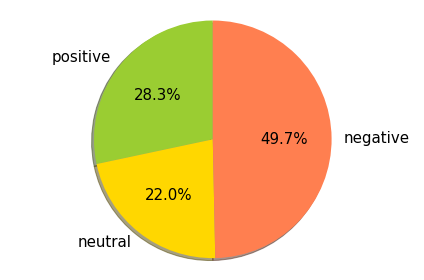

In [15]:
import json
import operator
import os
import re

import matplotlib.pyplot as plt
from prettytable import PrettyTable
from textblob import TextBlob

from lib.word_utils import word_filter


def load_json(path):
    whole_data = []
    path = './' + path
    for filename in os.listdir(path):
        with open(path + '/' + filename, mode='r') as f:
            whole_data += json.load(f)
    return whole_data


def draw_pie_chart(path, data):
    labels = ['positive', 'neutral', 'negative']
    colors = ['yellowgreen', 'gold', 'coral']
    patches, texts, autotexts = plt.pie(data, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True,
                                        startangle=90)
    for text in texts:
        text.set_fontsize(15)
    for autotext in autotexts:
        autotext.set_fontsize(15)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(path + '-pie.png')
    plt.show()


def get_tweet_sentiment(tweet):
    sentence = ''
    for word in tweet.split():
        word = word_filter(word)  # Todo word = word_filter(word, False)
        if len(word) > 0:
            sentence = sentence + ' ' + word
    # Todo sentence = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])| (\w +:\ /  \ /  \S +)", " ", tweet).split())
    analysis = TextBlob(sentence)
#     print('ORIGINAL:', tweet)
#     print('CLEANED:', sentence)
#     print(analysis)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


def analyze_data(path, max_num, language='en'):
    # A list of all the tweets collected.
    whole_data = load_json(path)
    attitude_count = {'positive': 0, 'negative': 0, 'neutral': 0}
    attitude_word_frequency = {'positive': {}, 'negative': {}, 'neutral': {}}
    for tweet in whole_data:
        if 'text' not in tweet:
            continue
        text = tweet['text']
        if language != 'en':
            try:
                text = TextBlob(text).translate(from_lang=language, to='en')
            except:
                pass
        attitude = get_tweet_sentiment(str(text))
        attitude_count[attitude] += 1
        for word in tweet['text'].split():
            word = word_filter(word)
            if len(word) > 0:
                attitude_word_frequency[attitude][word] = attitude_word_frequency[attitude].get(word, 0) + 1
    for key in attitude_word_frequency:
        sorted_list = reversed(sorted(attitude_word_frequency[key].items(), key=operator.itemgetter(1)))
        count = 0
        table = PrettyTable(['Rank', 'Word', 'Times'])
        for item in sorted_list:
            table.add_row([str(count + 1), item[0], item[1]])
            count = count + 1
            if count == max_num:
                break
        print('Word count in',key,'twitters:')
        print(table, '\n')
    draw_pie_chart(path, [attitude_count['positive'], attitude_count['negative'], attitude_count['neutral']])


analyze_data(path='p4-data', max_num=10, language='en')

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Wen Liu (wliu3@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 1 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

